In [120]:
import pandas as pd
import numpy as np

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling

import itertools

In [29]:
customer = pd.read_csv('831_final_customer_level_dataset.csv')

In [7]:
customer.head(100)

,customer_unique_id,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,8.0,5.0,1,17.73750,8.0,28.380000,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,1.0,4.0,1,27.19000,1.0,6.797500,0.0,0.0
2,0000f46a3911fa3c0805444483337064,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,8.0,3.0,1,10.77750,8.0,28.740000,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,4.0,4.0,1,10.90500,4.0,10.905000,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,6.0,5.0,1,32.81500,6.0,39.378000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,003c2067070f5b3d923235b1ea1cc17b,1.0,0.0,0.0,0.0,0.0,100.0,100.0,1,1.0,3.0,1,147.38000,1.0,49.126667,0.0,0.0
96,003c457932a554e4df13834237b1ed00,1.0,0.0,0.0,0.0,0.0,100.0,100.0,1,1.0,5.0,1,142.51000,1.0,28.502000,0.0,0.0
97,003d56767e53e08671de00da3fba8d40,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,8.0,5.0,1,22.32375,8.0,35.718000,0.0,0.0
98,003db7adfcdc49857b095a50191b6c9d,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,10.0,4.0,1,54.26600,10.0,135.665000,0.0,0.0


In [30]:
customer.info()
customer.shape
customer.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_unique_id           96096 non-null  object 
 1   count_boleto                 96096 non-null  float64
 2   count_credit_card            96096 non-null  float64
 3   count_voucher                96096 non-null  float64
 4   count_debit_card             96096 non-null  float64
 5   count_not_defined            96096 non-null  float64
 6   percentage_weekday           96096 non-null  float64
 7   percentage_day               96096 non-null  float64
 8   total_orders                 96096 non-null  int64  
 9   avg_payment_installments     96096 non-null  float64
 10  average_rating               96096 non-null  float64
 11  total_delivered_orders       96096 non-null  int64  
 12  value_per_installment        96095 non-null  float64
 13  avg_installment_

(96096, 17)

,count,mean,std,min,25%,50%,75%,max
count_boleto,96096.0,0.205877,0.418533,0.0,0.000,0.000,0.000000,6.00
count_credit_card,96096.0,0.799149,0.475645,0.0,1.000,1.000,1.000000,17.00
count_voucher,96096.0,0.060096,0.446083,0.0,0.000,0.000,0.000000,33.00
count_debit_card,96096.0,0.015911,0.126456,0.0,0.000,0.000,0.000000,2.00
count_not_defined,96096.0,0.000031,0.005587,0.0,0.000,0.000,0.000000,1.00
percentage_weekday,96096.0,77.032730,41.849774,0.0,100.000,100.000,100.000000,100.00
percentage_day,96096.0,60.943066,48.558726,0.0,0.000,100.000,100.000000,100.00
total_orders,96096.0,1.034809,0.214384,1.0,1.000,1.000,1.000000,17.00
avg_payment_installments,96096.0,2.979397,2.745285,0.0,1.000,2.000,4.000000,34.00
average_rating,96096.0,4.069511,1.353534,1.0,4.000,5.000,5.000000,5.00


## Missing value

In [21]:
customer.columns[customer.isnull().any()]

Index(['value_per_installment'], dtype='object')

In [31]:

customer[customer["value_per_installment"].isnull()]

,customer_unique_id,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order
49312,830d5b7aaa3b6f1e9ad63703bec97d23,0.0,0.0,0.0,0.0,0.0,100.0,100.0,1,0.0,1.0,1,NaN,0.0,0.0,0.0,0.0


### Delete record

In [32]:
# customer_Id: 830d5b7aaa3b6f1e9ad63703bec97d23
# order_id: bfbd0f9bdef84302105ad712db648a6c
# payment data missing. order value was 143.46. Assume 1 installment.
customer.drop(customer.index[49312], inplace = True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96095 entries, 0 to 96095
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_unique_id           96095 non-null  object 
 1   count_boleto                 96095 non-null  float64
 2   count_credit_card            96095 non-null  float64
 3   count_voucher                96095 non-null  float64
 4   count_debit_card             96095 non-null  float64
 5   count_not_defined            96095 non-null  float64
 6   percentage_weekday           96095 non-null  float64
 7   percentage_day               96095 non-null  float64
 8   total_orders                 96095 non-null  int64  
 9   avg_payment_installments     96095 non-null  float64
 10  average_rating               96095 non-null  float64
 11  total_delivered_orders       96095 non-null  int64  
 12  value_per_installment        96095 non-null  float64
 13  avg_installment_

## Inf

In [75]:
customer[customer.isin([np.inf, -np.inf]).any(1)]

,customer_unique_id,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order


In [73]:
# fix 2 dpa's that have 0 installments
customer.iloc[57517, customer.columns.get_loc('avg_installment_per_order')] = 1
customer.iloc[57517, customer.columns.get_loc('avg_payment_installments')] = 1
customer.iloc[57517, customer.columns.get_loc('value_per_installment')] = 129.94
customer.iloc[92129, customer.columns.get_loc('avg_installment_per_order')] = 1
customer.iloc[92129, customer.columns.get_loc('avg_payment_installments')] = 1
customer.iloc[92129, customer.columns.get_loc('value_per_installment')] = 58.69


In [74]:
customer.iloc[57517,:]
customer.iloc[92129,:]

customer_unique_id             9925e1d7dff0d807355599dee04830ab
count_boleto                                                  0
count_credit_card                                             1
count_voucher                                                 0
count_debit_card                                              0
count_not_defined                                             0
percentage_weekday                                          100
percentage_day                                              100
total_orders                                                  1
avg_payment_installments                                      1
average_rating                                                5
total_delivered_orders                                        1
value_per_installment                                    129.94
avg_installment_per_order                                     1
avg_order_value_over_rating                              25.988
avg_order_time                          

customer_unique_id             f54cea27c80dc09bfe07b1cf1e01b845
count_boleto                                                  0
count_credit_card                                             1
count_voucher                                                 0
count_debit_card                                              0
count_not_defined                                             0
percentage_weekday                                            0
percentage_day                                              100
total_orders                                                  1
avg_payment_installments                                      1
average_rating                                                5
total_delivered_orders                                        1
value_per_installment                                     58.69
avg_installment_per_order                                     1
avg_order_value_over_rating                              11.738
avg_order_time                          

# Random Sample

In [127]:
sample = customer.sample(frac=0.33, replace=False, random_state=42)

In [128]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31711 entries, 15547 to 64322
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_unique_id           31711 non-null  object 
 1   count_boleto                 31711 non-null  float64
 2   count_credit_card            31711 non-null  float64
 3   count_voucher                31711 non-null  float64
 4   count_debit_card             31711 non-null  float64
 5   count_not_defined            31711 non-null  float64
 6   percentage_weekday           31711 non-null  float64
 7   percentage_day               31711 non-null  float64
 8   total_orders                 31711 non-null  int64  
 9   avg_payment_installments     31711 non-null  float64
 10  average_rating               31711 non-null  float64
 11  total_delivered_orders       31711 non-null  int64  
 12  value_per_installment        31711 non-null  float64
 13  avg_installm

# Standardization

In [129]:
cols = list(sample)
for i in range(1,7):
    cols.pop(0)
cols

'customer_unique_id'

'count_boleto'

'count_credit_card'

'count_voucher'

'count_debit_card'

'count_not_defined'

['percentage_weekday',
 'percentage_day',
 'total_orders',
 'avg_payment_installments',
 'average_rating',
 'total_delivered_orders',
 'value_per_installment',
 'avg_installment_per_order',
 'avg_order_value_over_rating',
 'avg_order_time',
 'avg_voucher_per_order']

In [130]:
scaler = StandardScaler()
customer_std = sample.copy()
customer_std[cols] = scaler.fit_transform(sample[cols])

In [131]:
customer_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31711 entries, 15547 to 64322
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_unique_id           31711 non-null  object 
 1   count_boleto                 31711 non-null  float64
 2   count_credit_card            31711 non-null  float64
 3   count_voucher                31711 non-null  float64
 4   count_debit_card             31711 non-null  float64
 5   count_not_defined            31711 non-null  float64
 6   percentage_weekday           31711 non-null  float64
 7   percentage_day               31711 non-null  float64
 8   total_orders                 31711 non-null  float64
 9   avg_payment_installments     31711 non-null  float64
 10  average_rating               31711 non-null  float64
 11  total_delivered_orders       31711 non-null  float64
 12  value_per_installment        31711 non-null  float64
 13  avg_installm

In [87]:
#customer_std['percentage_weekday'] = customer_std['percentage_weekday']/100

In [89]:
#customer_std['percentage_day'] = customer_std['percentage_day']/100

In [132]:
customer_std.head(100)

,customer_unique_id,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order
15547,2964dcd7e8060025ce0a4a1d7a97fe27,0.0,1.0,0.0,0.0,0.0,0.552092,0.809765,-0.16986,1.819072,-0.052531,-0.020642,-0.215917,1.819072,0.327886,-0.107216,-0.131052
59000,9cf7324fd017fe2411c1633eb6cfb38d,0.0,1.0,0.0,0.0,0.0,0.552092,-1.246951,-0.16986,-0.720491,-0.052531,-0.020642,0.098615,-0.720491,-0.234949,-0.107216,-0.131052
44652,76d04d876f7ad112fc55b6227d2ae114,0.0,1.0,0.0,0.0,0.0,0.552092,-1.246951,-0.16986,0.005099,-0.052531,-0.020642,-0.066425,0.005099,-0.016233,-0.107216,-0.131052
83688,dea170647f2f74b0a96126e3393a2076,0.0,1.0,0.0,0.0,0.0,0.552092,0.809765,-0.16986,0.367893,-0.792554,-0.020642,-0.212015,0.367893,0.087856,-0.107216,-0.131052
61984,a4f7b546acc92f8e5e965504663631e4,0.0,1.0,0.0,0.0,0.0,-1.830152,0.809765,-0.16986,0.367893,-2.272599,-0.020642,-0.443296,0.367893,0.122862,-0.107216,-0.131052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78493,d0e278763a3c9f393870470a6ac51856,0.0,1.0,0.0,0.0,0.0,0.552092,0.809765,-0.16986,0.367893,0.687491,-0.020642,-0.067341,0.367893,0.009150,-0.107216,-0.131052
89548,ee4d047e8cf84484bdb439da5c3fd3f8,0.0,1.0,0.0,0.0,0.0,-1.830152,0.809765,-0.16986,1.093483,-0.792554,-0.020642,-0.337298,1.093483,0.076649,-0.107216,-0.131052
41326,6dc86e0006805cef06e23866562f1ff1,0.0,1.0,0.0,0.0,0.0,0.552092,-1.246951,-0.16986,-0.720491,0.687491,-0.020642,0.061760,-0.720491,-0.277259,-0.107216,-0.131052
31198,52e6877c9c3053d30e44ae424ee6fd6d,0.0,1.0,0.0,0.0,0.0,0.552092,-1.246951,-0.16986,-0.357696,-0.792554,-0.020642,-0.381177,-0.357696,-0.276962,-0.107216,-0.131052


# Clustering

In [133]:
c_std = customer_std.copy()
c_std = customer_std.drop(['customer_unique_id'], axis=1)

In [134]:
c_std.head()

,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order
15547,0.0,1.0,0.0,0.0,0.0,0.552092,0.809765,-0.16986,1.819072,-0.052531,-0.020642,-0.215917,1.819072,0.327886,-0.107216,-0.131052
59000,0.0,1.0,0.0,0.0,0.0,0.552092,-1.246951,-0.16986,-0.720491,-0.052531,-0.020642,0.098615,-0.720491,-0.234949,-0.107216,-0.131052
44652,0.0,1.0,0.0,0.0,0.0,0.552092,-1.246951,-0.16986,0.005099,-0.052531,-0.020642,-0.066425,0.005099,-0.016233,-0.107216,-0.131052
83688,0.0,1.0,0.0,0.0,0.0,0.552092,0.809765,-0.16986,0.367893,-0.792554,-0.020642,-0.212015,0.367893,0.087856,-0.107216,-0.131052
61984,0.0,1.0,0.0,0.0,0.0,-1.830152,0.809765,-0.16986,0.367893,-2.272599,-0.020642,-0.443296,0.367893,0.122862,-0.107216,-0.131052


In [106]:
c_std.to_csv('c_std.csv', index=False)

In [136]:
customer_hier = linkage(c_std, method='ward', metric = 'euclidean')

<Figure size 864x648 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Observations')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [73.75, 73.75, 121.25, 121.25],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [155.0, 155.0, 180.0, 180.0],
  [97.5, 97.5, 167.5, 167.5],
  [27.5, 27.5, 132.5, 132.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [232.5, 232.5, 262.5, 262.5],
  [210.0, 210.0, 247.5, 247.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [292.5, 292.5, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  

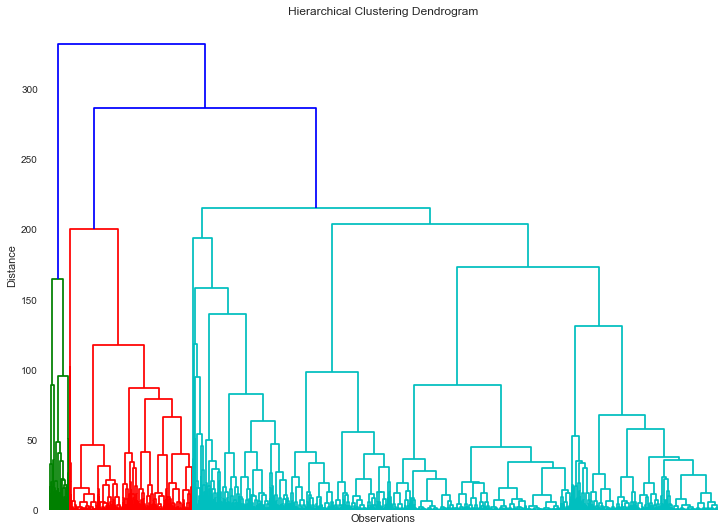

In [150]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(customer_hier,
           #truncate_mode = 'level',
           #p = 5,
           show_leaf_counts=False,
           no_labels=True)
           

In [138]:
segs = fcluster(customer_hier, 3, criterion="maxclust")

In [143]:
sample.head(100)

,customer_unique_id,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order,segment
15547,2964dcd7e8060025ce0a4a1d7a97fe27,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,8.0,4.0,1,50.476250,8.0,100.952500,0.0,0.0,2
59000,9cf7324fd017fe2411c1633eb6cfb38d,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,1.0,4.0,1,95.110000,1.0,23.777500,0.0,0.0,3
44652,76d04d876f7ad112fc55b6227d2ae114,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,3.0,4.0,1,71.690000,3.0,53.767500,0.0,0.0,3
83688,dea170647f2f74b0a96126e3393a2076,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,4.0,3.0,1,51.030000,4.0,68.040000,0.0,0.0,3
61984,a4f7b546acc92f8e5e965504663631e4,0.0,1.0,0.0,0.0,0.0,0.0,100.0,1,4.0,1.0,1,18.210000,4.0,72.840000,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78493,d0e278763a3c9f393870470a6ac51856,0.0,1.0,0.0,0.0,0.0,100.0,100.0,1,4.0,5.0,1,71.560000,4.0,57.248000,0.0,0.0,2
89548,ee4d047e8cf84484bdb439da5c3fd3f8,0.0,1.0,0.0,0.0,0.0,0.0,100.0,1,6.0,3.0,1,33.251667,6.0,66.503333,0.0,0.0,3
41326,6dc86e0006805cef06e23866562f1ff1,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,1.0,5.0,1,89.880000,1.0,17.976000,0.0,0.0,3
31198,52e6877c9c3053d30e44ae424ee6fd6d,0.0,1.0,0.0,0.0,0.0,100.0,0.0,1,2.0,3.0,1,27.025000,2.0,18.016667,0.0,0.0,3


In [140]:
sample['segment'] = segs

# Cluster Analysis

In [146]:
# mean
cluster_agg = sample.groupby(['segment']).mean()
cluster_agg

,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order
segment,,,,,,,,,,,,,,,,
1,0.404427,1.605634,0.132797,0.024145,0.001006,76.413481,61.669541,2.100604,3.586359,4.114554,2.032193,68.784715,3.586359,47.832737,81.455483,0.064638
2,0.000000,0.999486,0.114555,0.000000,0.000000,82.128995,67.619863,1.002397,7.489897,4.245148,1.001541,35.793374,7.489897,78.445989,0.038527,0.106050
3,0.249226,0.715480,0.045825,0.020943,0.000040,75.595932,58.945344,1.000201,1.904631,4.028360,0.965269,92.248426,1.904631,51.048499,0.001869,0.045772


In [147]:
# size of each cluster
cluster_agg['N Obs'] = sample[['total_orders', 'segment']].groupby(['segment']).count()
cluster_agg['Prob Obs'] = cluster_agg['N Obs']/ cluster_agg['N Obs'].sum()

cluster_agg

,count_boleto,count_credit_card,count_voucher,count_debit_card,count_not_defined,percentage_weekday,percentage_day,total_orders,avg_payment_installments,average_rating,total_delivered_orders,value_per_installment,avg_installment_per_order,avg_order_value_over_rating,avg_order_time,avg_voucher_per_order,N Obs,Prob Obs
segment,,,,,,,,,,,,,,,,,,
1,0.404427,1.605634,0.132797,0.024145,0.001006,76.413481,61.669541,2.100604,3.586359,4.114554,2.032193,68.784715,3.586359,47.832737,81.455483,0.064638,994,0.031346
2,0.000000,0.999486,0.114555,0.000000,0.000000,82.128995,67.619863,1.002397,7.489897,4.245148,1.001541,35.793374,7.489897,78.445989,0.038527,0.106050,5840,0.184163
3,0.249226,0.715480,0.045825,0.020943,0.000040,75.595932,58.945344,1.000201,1.904631,4.028360,0.965269,92.248426,1.904631,51.048499,0.001869,0.045772,24877,0.784491


In [148]:
data_mean = sample.mean()

In [149]:
data_mean

count_boleto                    0.208193
count_credit_card               0.795686
count_voucher                   0.061209
count_debit_card                0.017186
count_not_defined               0.000063
percentage_weekday             76.824709
percentage_day                 60.628263
total_orders                    1.035098
avg_payment_installments        2.985946
average_rating                  4.070986
total_delivered_orders          1.005392
value_per_installment          81.115998
avg_installment_per_order       2.985946
avg_order_value_over_rating    55.993309
avg_order_time                  2.561832
avg_voucher_per_order           0.057464
segment                         2.753146
dtype: float64